In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [5]:
sns.set_palette('Set2')

heatcmap = sns.diverging_palette(230, 20, as_cmap=True)

In [94]:
customer_df = pd.read_csv('Customer.csv')

print(customer_df.head())

customer_df = customer_df.drop('CustomerID', axis=1)
customer_df = customer_df.rename(index=str, columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
})

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
print('Shape: ', customer_df.shape)

print('---')
print(customer_df.dtypes)

print('---')
print(customer_df.describe())

print('---')
print(customer_df.isnull().sum())

Shape:  (200, 4)
---
Gender           object
Age               int64
Income            int64
SpendingScore     int64
dtype: object
---
              Age      Income  SpendingScore
count  200.000000  200.000000     200.000000
mean    38.850000   60.560000      50.200000
std     13.969007   26.264721      25.823522
min     18.000000   15.000000       1.000000
25%     28.750000   41.500000      34.750000
50%     36.000000   61.500000      50.000000
75%     49.000000   78.000000      73.000000
max     70.000000  137.000000      99.000000
---
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


In [8]:
customer_df.head()


,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


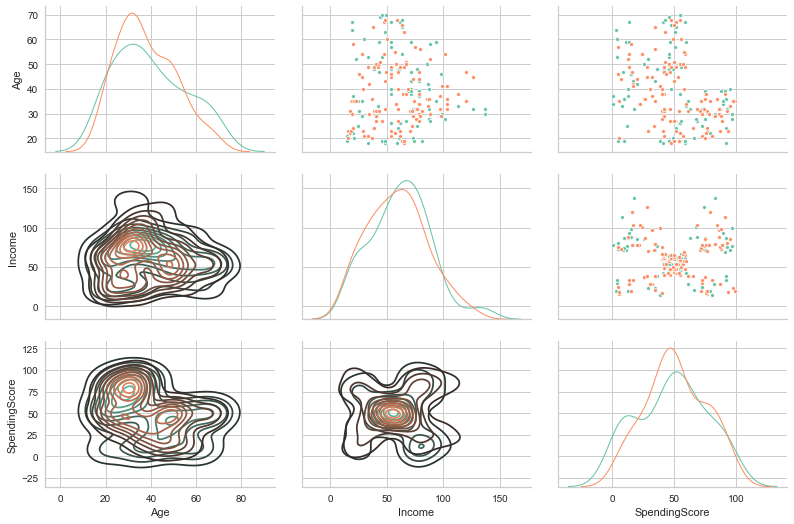

In [9]:
grid = sns.PairGrid(customer_df, hue='Gender', diag_sharey=False, aspect=1.5)

grid.map_upper(sns.scatterplot, s=15)
grid.map_lower(sns.kdeplot)
grid.map_diag(sns.kdeplot, lw=1);

In [10]:
fig = px.pie(
    data_frame=customer_df, 
    names='Gender', 
    title='Customer Genders', 
    hole=0.1, 
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.show()

In [11]:
customer_df[['Age', 'Income']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0


AttributeError: module 'seaborn' has no attribute 'histplot'

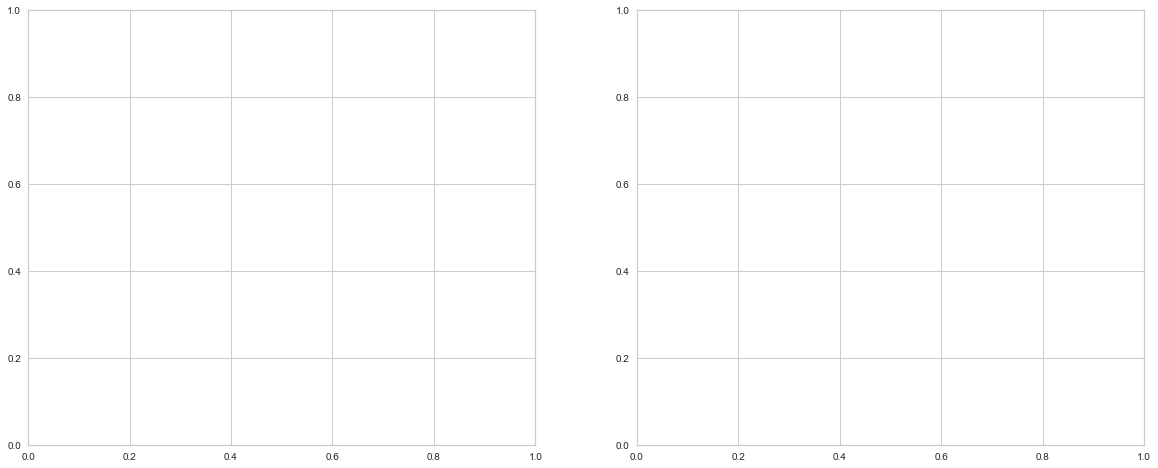

In [15]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(data=customer_df, x='Age', hue='Gender', binwidth=10, multiple='stack', ax=ax0)
sns.histplot(data=customer_df, x='Income', hue='Gender', binwidth=10, multiple='stack', ax=ax1);

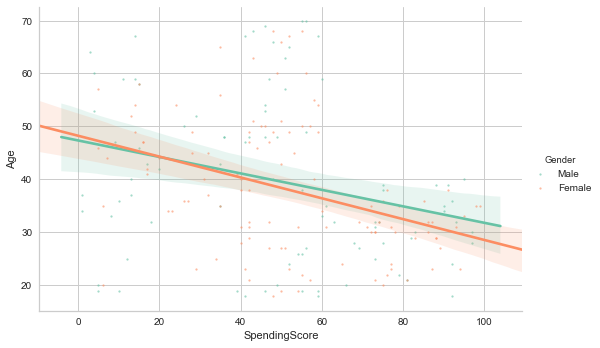

In [16]:
sns.lmplot(
    data=customer_df,
    x='SpendingScore', 
    y='Age', 
    hue='Gender',
    aspect=1.5,
    scatter_kws={'s': 5, 'alpha': 0.6}
);

In [17]:
def impute_spending_group(spending_score):
    if spending_score <= 35:
        return 'low'
    if spending_score > 35 and spending_score <= 65:
        return 'medium'
    if spending_score > 65:
        return 'high'

customer_df['SpendingGroup'] = customer_df['SpendingScore'].apply(impute_spending_group)

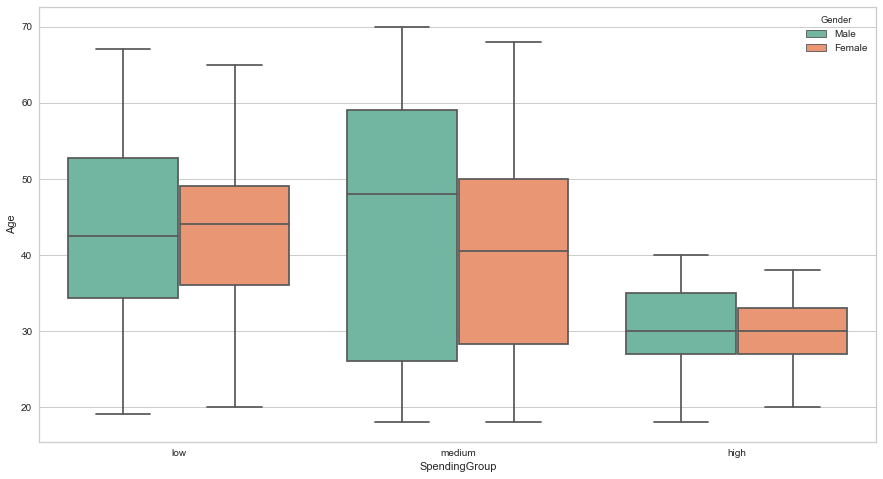

In [18]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=customer_df, x='SpendingGroup', y='Age', hue='Gender', order=['low', 'medium', 'high']);

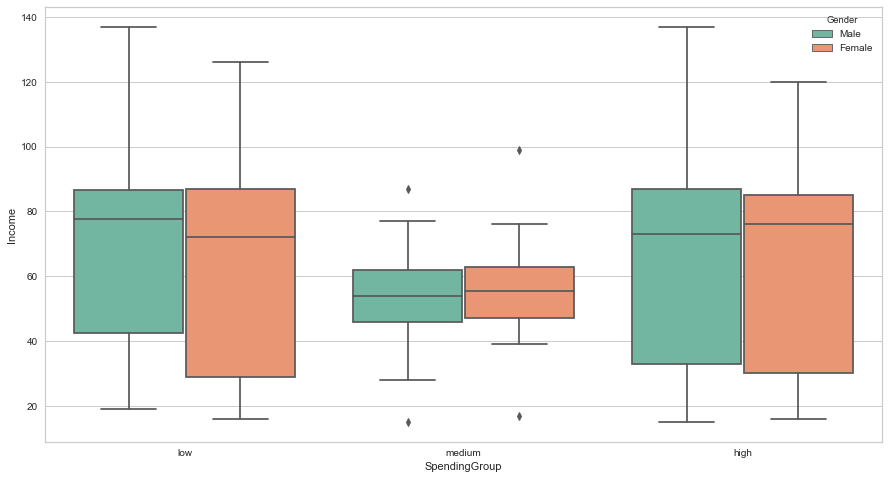

In [19]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=customer_df, x='SpendingGroup', y='Income', hue='Gender', order=['low', 'medium', 'high']);

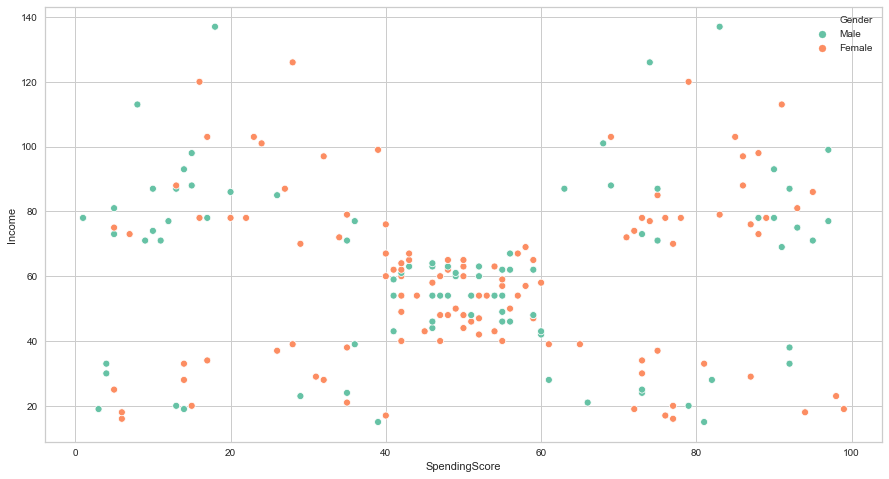

In [20]:
plt.figure(figsize=(15, 8))

sns.scatterplot(data=customer_df, x='SpendingScore', y='Income', hue='Gender');

In [21]:
customer_df.head()

,Gender,Age,Income,SpendingScore,SpendingGroup
0,Male,19,15,39,medium
1,Male,21,15,81,high
2,Female,20,16,6,low
3,Female,23,16,77,high
4,Female,31,17,40,medium


In [22]:
def binary_map(x):
    return x.map({'Male': 1, "Female": 0})

In [24]:
variablelist =  ['Gender']
customer_df[variablelist] = customer_df[variablelist].apply(binary_map)

In [29]:
customer_df = customer_df.drop("SpendingGroup", axis=1)
customer_df.head()

,Gender,Age,Income,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [33]:
scaler = StandardScaler().fit(customer_df)

In [34]:
X = scaler.transform(customer_df)

In [37]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=20)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=20,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

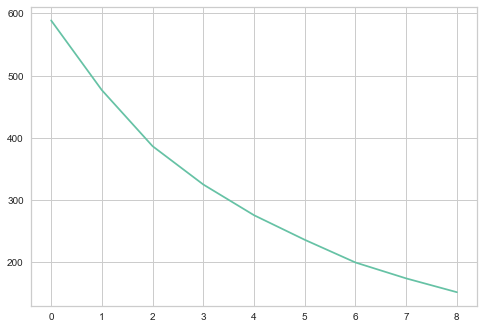

In [39]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=20)
    kmeans.fit(X)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.show()

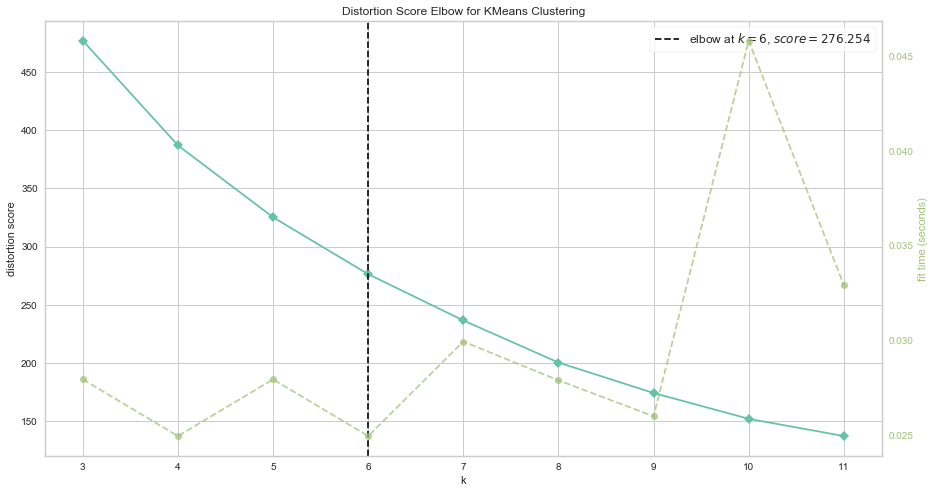

In [40]:
plt.figure(figsize=(15, 8))

elbow_visualizer = KElbowVisualizer(kmeans, k=(3, 12))

elbow_visualizer.fit(X)
elbow_visualizer.show();

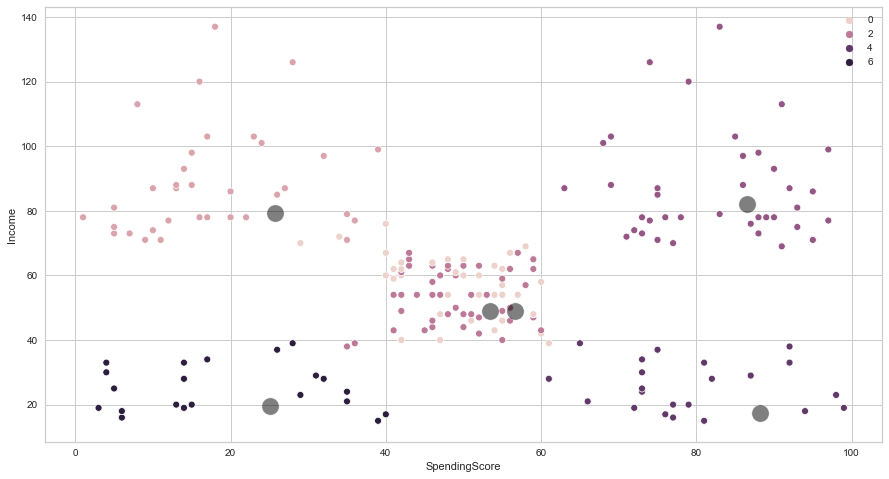

In [70]:
kmeans.n_clusters = 6
kmeans.fit(customer_df)

kmean_clusters = kmeans.labels_
kmean_centroids = kmeans.cluster_centers_
# y2 = scaler.inverse_transform(kmean_centroids)
# print(y2)
# print(kmean_centroids)

plt.figure(figsize=(15, 8))

sns.scatterplot(data=customer_df, x='SpendingScore', y='Income', hue=kmean_clusters);
sns.scatterplot(x=kmean_centroids[:, 2], y=kmean_centroids[:, 3], color='black', s=300, alpha=0.5);

In [91]:
import plotly.express as px

import plotly.graph_objs as go

kmean_centroids2 = pd.DataFrame(kmean_centroids)
kmean_centroids2.columns = ['1', '2', '3', '4']


customer_df2 = customer_df.copy()
kmean_centroids2.columns = customer_df2.columns
customer_df2 = customer_df2.append(kmean_centroids2)
kmean_clusters2 = np.append(kmean_clusters, [1,1,1,1,1,1])
size2 = pd.DataFrame(np.ones(len(kmean_clusters2)))
size2.iloc[-1] = 5
size2.iloc[-2] = 5
size2.iloc[-3] = 5
size2.iloc[-4] = 5
size2.iloc[-5] = 5
size2.iloc[-6] = 5

fig = px.scatter_3d(
    customer_df2,
    x='Age', 
    y='SpendingScore', 
    z='Income', 
    color=kmean_clusters2.astype(str),
    opacity=0.8,
    height=700,
    width=700,
    title='Clusters in Age-SpendingScore-Income space',
    color_discrete_sequence=px.colors.qualitative.Set2,
    size=size2
)
fig.show()
